<a href="https://colab.research.google.com/github/nexustech101/colab-notebooks/blob/main/Projectile_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Seed for reproducibility
np.random.seed(0)

# Generate synthetic data
num_samples = 100

# Generate features
angles = np.random.uniform(0.1, 1.0, num_samples)  # Launch angle in radians
velocities = np.random.uniform(10, 50, num_samples)  # Launch velocity in m/s
heights = np.random.uniform(0, 5, num_samples)       # Initial height in meters

# Generate outputs (simple physics-based synthetic model for demonstration)
impact_horizontal_distance = (
    velocities**2 * np.sin(2 * angles) / 9.81 + np.random.normal(0, 1, num_samples)
)
impact_vertical_distance = (
    velocities**2 * np.sin(angles)**2 / (2 * 9.81) + heights + np.random.normal(0, 1, num_samples)
)
time_of_flight = (
    velocities * np.sin(angles) / 9.81 + np.random.normal(0, 0.1, num_samples)
)

# Stack features and outputs
X = np.column_stack((angles, velocities, heights))
y = np.column_stack((impact_horizontal_distance, impact_vertical_distance, time_of_flight))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert arrays to DataFrames
df_train = pd.DataFrame(X_train, columns=['Launch Angle', 'Launch Velocity', 'Initial Height'])
df_train_targets = pd.DataFrame(y_train, columns=['Impact Horizontal Distance', 'Impact Vertical Distance', 'Time of Flight'])

df_test = pd.DataFrame(X_test, columns=['Launch Angle', 'Launch Velocity', 'Initial Height'])
df_test_targets = pd.DataFrame(y_test, columns=['Impact Horizontal Distance', 'Impact Vertical Distance', 'Time of Flight'])

# Save DataFrames to CSV files
df_train.to_csv('train_features.csv', index=False)
df_train_targets.to_csv('train_targets.csv', index=False)
df_test.to_csv('test_features.csv', index=False)
df_test_targets.to_csv('test_targets.csv', index=False)

print("Data saved to CSV files successfully!")


Data saved to CSV files successfully!


In [ ]:
from pprint import pprint

def get_training_data():
    x_train = pd.read_csv('train_features.csv')
    y_trian = pd.read_csv('train_targets.csv')
    return x_train, y_trian

def get_testing_data():
    x_test = pd.read_csv('test_features.csv')
    y_test = pd.read_csv('test_targets.csv')
    return x_test, y_test

x_train, y_train = get_training_data()
x_test, y_test = get_testing_data()

poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x_train)

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model.fit(x_poly, y_train)

x_test_poly = poly.transform(x_test)
y_pred = model.predict(x_test_poly)

test_x = [[np.pi/4, 20, 0]]

test_prediction = model.predict(poly.transform(test_x))
print(test_prediction)


[[41.98139255  9.15927707  1.70201867]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Mean Squared Error: 1.65
R^2 Score: 0.99


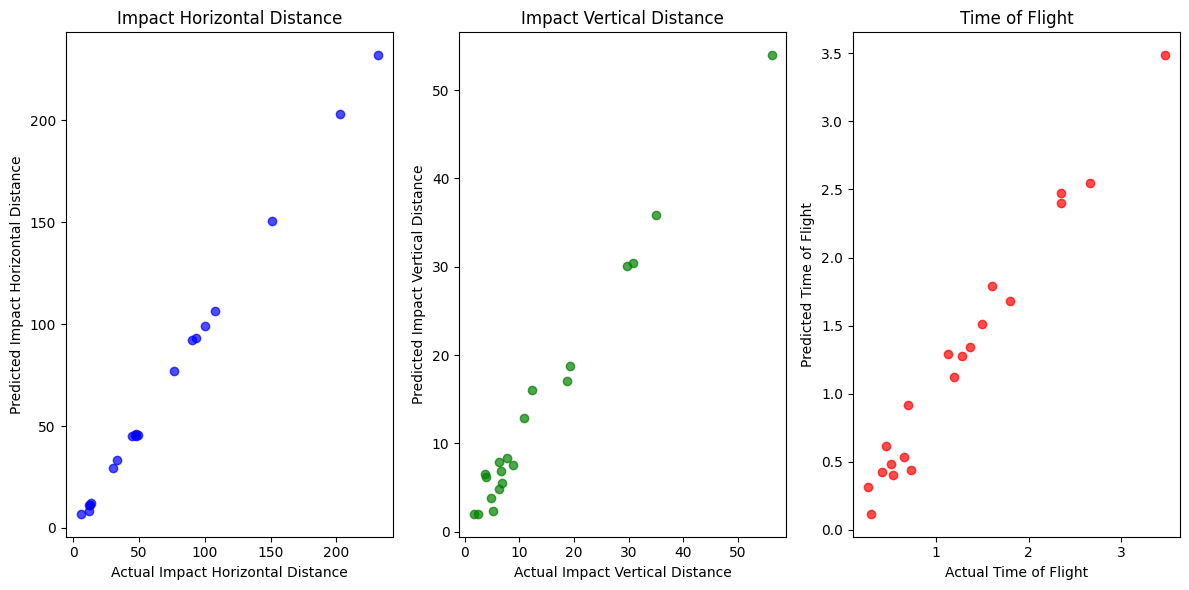

In [ ]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plotting Actual vs Predicted Values
plt.figure(figsize=(12, 6))

# Impact Horizontal Distance
plt.subplot(1, 3, 1)
plt.scatter(y_test.iloc[:, 0], y_pred[:, 0], color='blue', alpha=0.7)
plt.xlabel('Actual Impact Horizontal Distance')
plt.ylabel('Predicted Impact Horizontal Distance')
plt.title('Impact Horizontal Distance')

# Impact Vertical Distance
plt.subplot(1, 3, 2)
plt.scatter(y_test.iloc[:, 1], y_pred[:, 1], color='green', alpha=0.7)
plt.xlabel('Actual Impact Vertical Distance')
plt.ylabel('Predicted Impact Vertical Distance')
plt.title('Impact Vertical Distance')

# Time of Flight
plt.subplot(1, 3, 3)
plt.scatter(y_test.iloc[:, 2], y_pred[:, 2], color='red', alpha=0.7)
plt.xlabel('Actual Time of Flight')
plt.ylabel('Predicted Time of Flight')
plt.title('Time of Flight')

plt.tight_layout()
plt.show()

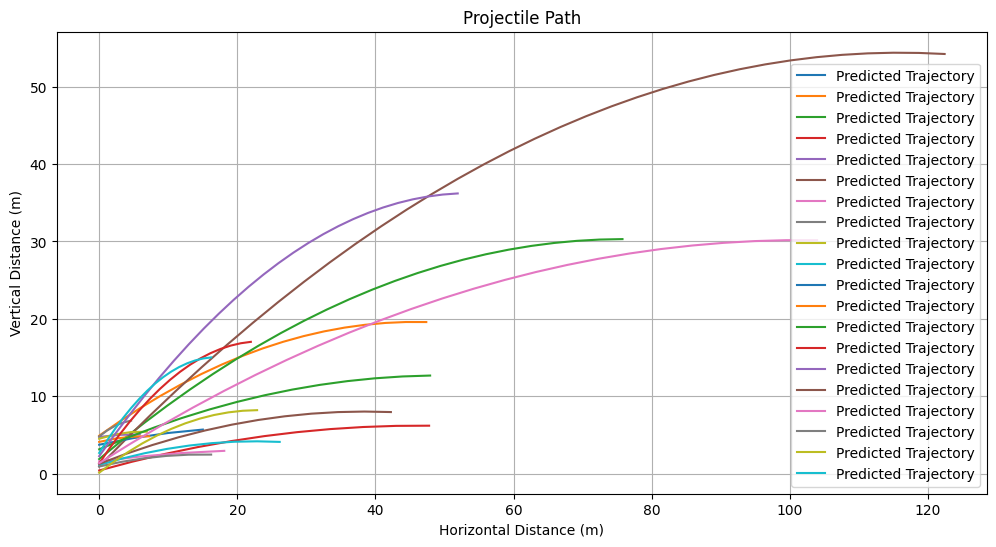

In [ ]:
# Define gravity and time step

g = 9.81  # m/s²
time_step = 0.1  # Time step for simulation

def plot_trajectory(angle, velocity, height, predicted_impact_distance, predicted_time_of_flight):
    # Time of flight and time points
    t_flight = np.linspace(0, predicted_time_of_flight, int(predicted_time_of_flight / time_step))

    # Calculate trajectory
    x = velocity * np.cos(angle) * t_flight
    y = height + velocity * np.sin(angle) * t_flight - 0.5 * g * t_flight**2

    plt.plot(x, y, label='Predicted Trajectory')
    plt.xlabel('Horizontal Distance (m)')
    plt.ylabel('Vertical Distance (m)')
    plt.title('Projectile Path')
    plt.legend()
    plt.grid(True)

# Plot the predicted trajectories for each test case
plt.figure(figsize=(12, 6))
for i in range(len(x_test)):
    angle = x_test.iloc[i, 0]
    velocity = x_test.iloc[i, 1]
    height = x_test.iloc[i, 2]
    predicted_impact_distance = y_pred[i, 0]
    predicted_time_of_flight = y_pred[i, 2]

    plot_trajectory(angle, velocity, height, predicted_impact_distance, predicted_time_of_flight)

plt.show()